<a href="https://colab.research.google.com/github/TeamHub2/Deep-Learning/blob/main/Final_year_project_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Paddy Dataset/android train',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 768 files belonging to 6 classes.


In [ ]:
class_name=dataset.class_names
class_name

['Bacterial Blight_g',
 'Brown spot_g',
 'Healthy_g',
 'Hispa_g',
 'Leaf  Smut_g',
 'Leaf Blast_g']

In [ ]:
len(dataset)

24

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[2 4 2 2 0 0 2 3 4 0 4 2 5 4 3 0 4 4 1 4 1 0 0 4 1 4 3 4 4 1 2 5]


In [ ]:

for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[217.       219.       208.      ]
  [217.       219.       208.      ]
  [217.       219.       208.      ]
  ...
  [247.91623  247.91623  239.91623 ]
  [246.       247.       239.21094 ]
  [245.       248.       241.      ]]

 [[217.       219.       208.      ]
  [217.       219.       208.      ]
  [217.       219.       208.      ]
  ...
  [247.       247.       239.      ]
  [246.       247.       239.21094 ]
  [245.       248.       241.      ]]

 [[217.       219.       208.      ]
  [217.       219.       208.      ]
  [217.       219.       208.      ]
  ...
  [246.       246.       238.      ]
  [246.       247.       239.21094 ]
  [245.       248.       241.      ]]

 ...

 [[ 76.41797   95.41797   40.41797 ]
  [ 70.25131   89.25131   34.251312]
  [ 66.10849   87.10849   31.10849 ]
  ...
  [237.0586   238.0586   230.0586  ]
  [230.15106  231.15106  223.15106 ]
  [217.9783   218.9783   210.9783  ]]

 [[ 72.46484   93.46484   37.464844]
  [ 67.15079   88.15079   32.150787]


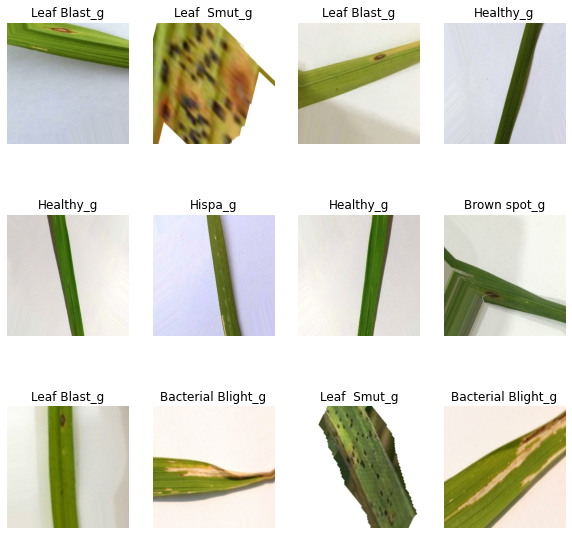

In [ ]:

plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_name[labels_batch[i]])
    plt.axis("off")
    
 

In [ ]:
len(dataset)

24

In [ ]:

train_size = 0.8
len(dataset)*train_size

19.200000000000003

In [ ]:
train_ds = dataset.take(19)
len(train_ds)

19

In [ ]:

test_ds = dataset.skip(19)
len(test_ds)

5

In [ ]:
val_size=0.1
len(dataset)*val_size

2.4000000000000004

In [ ]:
val_ds = test_ds.take(2)
len(val_ds)

2

In [ ]:
test_ds = test_ds.skip(2)
len(test_ds)

3

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

19

In [ ]:
len(val_ds)

2

In [ ]:
len(test_ds)

3

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
    
])

model.build(input_shape=input_shape)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/50
19/19 [==============================] - 81s 283ms/step - loss: 1.7043 - accuracy: 0.2220 - val_loss: 1.4334 - val_accuracy: 0.3594
Epoch 2/50
19/19 [==============================] - 2s 124ms/step - loss: 1.4327 - accuracy: 0.3750 - val_loss: 1.6104 - val_accuracy: 0.2500
Epoch 3/50
19/19 [==============================] - 2s 120ms/step - loss: 1.3963 - accuracy: 0.3816 - val_loss: 1.1643 - val_accuracy: 0.5000
Epoch 4/50
19/19 [==============================] - 2s 121ms/step - loss: 1.2879 - accuracy: 0.4605 - val_loss: 1.0855 - val_accuracy: 0.5469
Epoch 5/50
19/19 [==============================] - 2s 120ms/step - loss: 1.2530 - accuracy: 0.4572 - val_loss: 1.1379 - val_accuracy: 0.5156
Epoch 6/50
19/19 [==============================] - 2s 120ms/step - loss: 1.1936 - accuracy: 0.4836 - val_loss: 1.0369 - val_accuracy: 0.5469
Epoch 7/50
19/19 [==============================] - 2s 121ms/step - loss: 1.1593 - accuracy: 0.5049 - val_loss: 1.1065 - val_accuracy: 0.4844
Epoch

In [ ]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 3s 55ms/step - loss: 0.4569 - accuracy: 0.8125


In [ ]:
history

In [ ]:
history.params

{'epochs': 50, 'steps': 19, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:

len(history.history['loss'])

50

In [ ]:
history.history['loss'][:5]

[1.7043344974517822,
 1.4326872825622559,
 1.3963350057601929,
 1.2878589630126953,
 1.2530150413513184]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

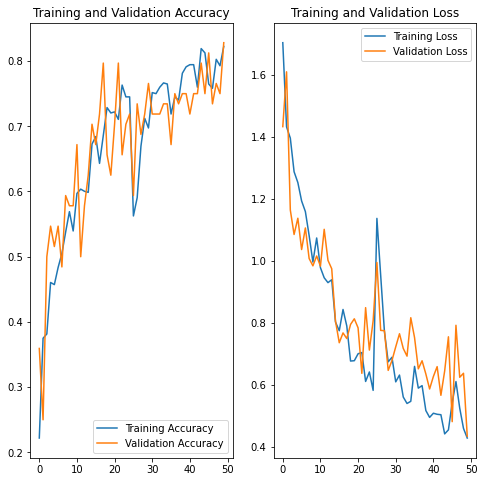

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Leaf Blast_g
predicted label: Leaf Blast_g


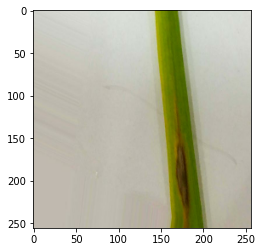

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

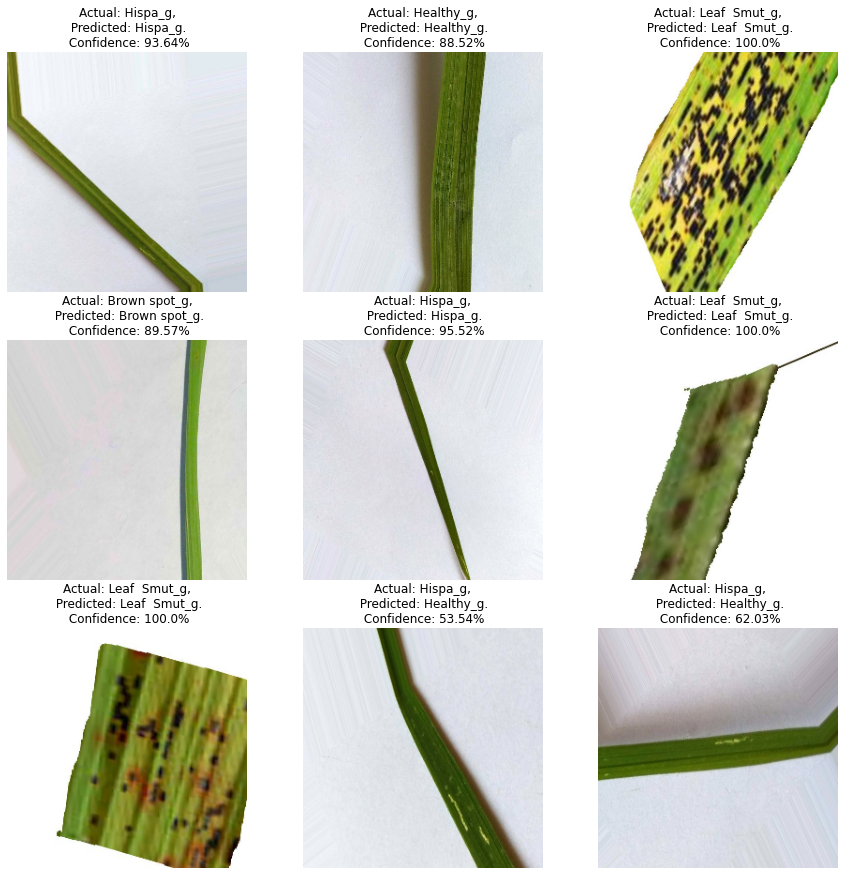

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import numpy as np
from sklearn import metrics

predictions = model.predict_generator(test_ds)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test_ds.classes
class_labels = ['Bectarial blight','Brown spot','Healthy','Hispa','Leaf blast','Leaf smut']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


AttributeError: ignored